# Assignment 3 - Supervised Learning

## *Juli You*
Netid:  *jy243*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a) What is the likelihood function of the data that we will wish to maximize?**

The probability of one observation:
$$P(Y=1|X=x_i) = \sigma(\mathbf{w}^T\mathbf{x}_i)$$
$$P(Y=0|X=x_i) = 1 - P(Y=1|X=x_i) = 1 - \sigma(\mathbf{w}^T\mathbf{x}_i)$$

The probability of all observations:
$$
\begin{aligned}
L(\mathbf{w}) &= \prod_{i=1}^{N}P(Y=0|X=x_i)^{1-y_i} P(Y=1|X=x_i)^{y_i}\\
     &= \prod_{i=1}^{N} \left(1-\sigma(\mathbf{w}^T\mathbf{x}_i)\right)^{1-y_i} \left(\sigma(\mathbf{w}^T\mathbf{x}_i)\right)^{y_i} \\
\end{aligned}
$$


**(b) Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).**

Cost function of the model parameters:
$$
\begin{aligned}
C(\mathbf{w})
&= -ln[\prod_{i=1}^{N}\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]^{1-y_i}]\\
&= -\sum_{i=1}^{N}ln(\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]^{1-y_i})\\
&= -\sum_{i=1}^{N}[y_{i}ln(\sigma(\mathbf{w}^T \mathbf{x}_i))+(1-y_{i})ln(1 - \sigma(\mathbf{w}^T \mathbf{x}_i))]\\
\end{aligned}
$$


**(c) Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.**

$$
\begin{aligned}
\frac{\partial C}{\partial w_0}
&= -\sum_{i=1}^{N}[y_i\frac{e^{-(\mathbf{w}^T \mathbf{x}_i)}}{\sigma(\mathbf{w}^T \mathbf{x}_i)(1+e^{-(\mathbf{w}^T \mathbf{x}_i))^2}}-(1-y_i)\frac{e^{-(\mathbf{w}^T \mathbf{x}_i)}}{(1-\sigma(\mathbf{w}^T \mathbf{x}_i))(1+e^{-(\mathbf{w}^T \mathbf{x}_i))^2}}]\\
&=-\sum_{i=1}^{N}[y_i\frac{e^{-(\mathbf{w}^T \mathbf{x}_i)}}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}-(1-y_i)\frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}]\\
&=-\sum_{i=1}^{N}\frac{y_{i}e^{-(\mathbf{w}^T \mathbf{x}_i)}+y_{i}-1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}\\
&=-\sum_{i=1}^{N}[y_{i}-\frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}]\\
&=-\sum_{i=1}^{N}[y_{i}-\sigma(\mathbf{w}^T \mathbf{x}_i)]\\
\end{aligned}
$$

$$
\begin{aligned}
\frac{\partial C}{\partial w_1}
&= -\sum_{i=1}^{N}[y_i\frac{x_{i,1}e^{-(\mathbf{w}^T \mathbf{x}_i)}}{\sigma(\mathbf{w}^T \mathbf{x}_i)(1+e^{-(\mathbf{w}^T \mathbf{x}_i))^2}}-(1-y_i)\frac{x_{i,1}e^{-(\mathbf{w}^T \mathbf{x}_i)}}{(1-\sigma(\mathbf{w}^T \mathbf{x}_i))(1+e^{-(\mathbf{w}^T \mathbf{x}_i))^2}}]\\
&=-\sum_{i=1}^{N}[y_i\frac{x_{i,1}e^{-(\mathbf{w}^T \mathbf{x}_i)}}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}-(1-y_i)\frac{x_{i,1}}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}]\\
&=-\sum_{i=1}^{N}\frac{x_{i,1}(y_{i}e^{-(\mathbf{w}^T \mathbf{x}_i)}+y_{i}-1)}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}\\
&=-\sum_{i=1}^{N}[(y_{i}-\frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}})x_{i,1}]\\
&=-\sum_{i=1}^{N}[(y_{i}-\sigma(\mathbf{w}^T \mathbf{x}_i)x_{i,1}]
\end{aligned}
$$

$$
\begin{aligned}
\frac{\partial C}{\partial w_2}
&= -\sum_{i=1}^{N}[y_i\frac{x_{i,2}e^{-(\mathbf{w}^T \mathbf{x}_i)}}{\sigma(\mathbf{w}^T \mathbf{x}_i)(1+e^{-(\mathbf{w}^T \mathbf{x}_i))^2}}-(1-y_i)\frac{x_{i,2}e^{-(\mathbf{w}^T \mathbf{x}_i)}}{(1-\sigma(\mathbf{w}^T \mathbf{x}_i))(1+e^{-(\mathbf{w}^T \mathbf{x}_i))^2}}]\\
&=-\sum_{i=1}^{N}[y_i\frac{x_{i,2}e^{-(\mathbf{w}^T \mathbf{x}_i)}}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}-(1-y_i)\frac{x_{i,2}}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}]\\
&=-\sum_{i=1}^{N}\frac{x_{i,2}(y_{i}e^{-(\mathbf{w}^T \mathbf{x}_i)}+y_{i}-1)}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}\\
&=-\sum_{i=1}^{N}[(y_{i}-\frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}})x_{i,2}]\\
&=-\sum_{i=1}^{N}[(y_{i}-\sigma(\mathbf{w}^T \mathbf{x}_i)x_{i,2}]
\end{aligned}
$$

$$
\large \Leftrightarrow
\normalsize
\begin{aligned}
\nabla_{\mathbf{w}}C(\mathbf{w}) 
&=-\sum_{i=1}^{N}(y_{i}-\sigma(\mathbf{w}^T \mathbf{x}_i))[1,x_{i,1},x_{i,2}]
\end{aligned}
$$

**(d) Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.**

$$
\begin{aligned}
\mathbf{w} 
&= \mathbf{w} - \eta \nabla_{\mathbf{w}}C(\mathbf{w})\\
&= \mathbf{w} + \eta \sum_{i=1}^{N}(y_{i}-\sigma(\mathbf{w}^T \mathbf{x}_i))[1,x_{i,1},x_{i,2}]\\
\end{aligned}
$$



**(e) Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?**

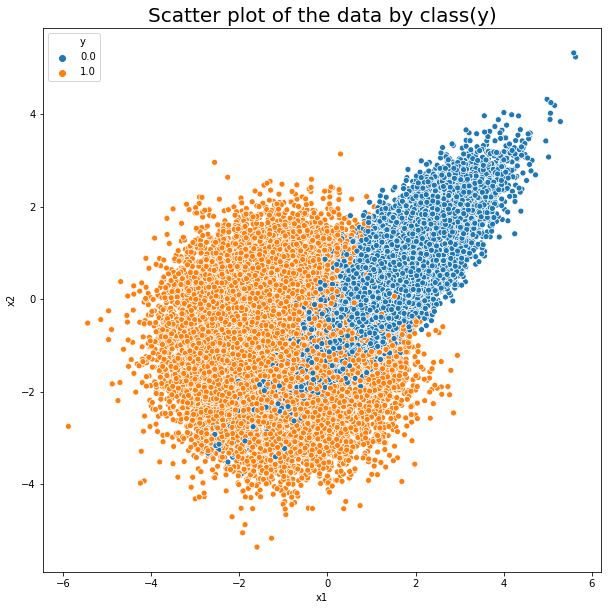

In [8]:
#(e)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
data = pd.read_csv("A3_Q1_data.csv")
data1 = data.loc[data["y"] == 1]
data0 = data.loc[data["y"] == 0]
plot = sns.scatterplot(x=data["x1"], y=data["x2"], hue=data["y"])
plot.set_title("Scatter plot of the data by class(y)", fontsize = 20)
plt.show()

No, the data do not appear separable. They have a large portion overlapping with each other, so logistic regression may not be a good choice for these data.

**(f) Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?**

In [4]:
print("Number of missing value ")
print(data.isnull().sum())

Number of missing value 
x1    0
x2    0
y     0
dtype: int64


In [5]:
data.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


From the analysis above, we can see there is no missing data. Also, the x1 and x2 appears to have very similar scale, so we don't need to normalize them.

**(g) Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.**

In [6]:
def sigmoid(x,w):
    x = np.array(x)
    w = np.array(w)
    x = np.c_[np.ones((x.shape[0], 1)), x]
    expn = np.exp(-np.dot(x,w))
    return (1+expn)**(-1)

def predict(x,w):
    return sigmoid(x,w) > 0.5

**(g) Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.**
**(h) Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.**
**(i) Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.**
**(j) At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. **

In [12]:
# Self-defined function of Logistic Regression

class LogReg():
    def __init__(self, learningRate = 0.01, deltaCost = 10e-6):
        self.initialParameters = np.random.rand(2,1)
        self.learningRate = learningRate
        self.deltaCost = deltaCost
        self.w = None
        self.train_cost_history = []
        self.test_cost_history = []
        
    #(g)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #(g)
    def predict(self, x):
        return self.sigmoid(np.dot(x, self.initialParameters))
    
    #(h)
    def cost(self, X, Y):
        yHat = self.predict(X)
        cost = -np.dot(Y.T, np.log(yHat))- np.dot((1-Y).T, np.log(1-yHat))
        return cost/len(Y)

    #(i)
    def gradient(self, X, Y):
        yHat = self.predict(X)
        gradient = np.dot(X.T, (yHat - Y))/len(Y)
        return gradient
   
    #(j)
    def fit(self, x_train, y_train, w, learningRate):
        w = np.random.random(w.shape)
        
        x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))
       # x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))
        y_train = y_train.reshape(len(y_train),1)
       # y_test = y_test.reshape(len(y_test),1)
        cost_train0 = []
       # cost_test0 = []
        parameter_old = w
        paremeter_new = w
        count = 0
        distance = 1
        
        
        while distance >= self.deltaCost:
            
            #cost_train = self.cost(X=x_train, Y=y_train)
            #cost_test = self.cost(X=x_test, Y=y_test)
            #cost_train0.append(cost_train)
            #cost_test0.append(cost_test)
            #if (i+1) % 10 == 0:
            #    print("epoch: {}, current train cost: {} , test cost: {}".format(i+1, cost_train.item(0), cost_test.item(0)))
            #    pass    
            #yHat = self.predict(x_train)
            parameter_old = parameter_new
            grad = self.gradient(x_train, y_train)
            parameter_new = parameter_old  grad * learningRate  
            distance = np.linalg.norm(parameter_new, ord = 2) - np.linalg.norm(parameter_old, ord = 2)
            count += 1
            print(count)
        return cost_train0, cost_test0, parameter
    '''
    
    def fit(self, x_train, y_train, x_test, y_test, lr, epoch=500, show_hist=True):
        # initialize weight
        self.w = np.random.rand(x_train.shape[1])
        
        self.e = 0
        while self.e <= epoch:
            current_w = self.w
            
            # cost
            c_train = self.cost(X=x_train, Y=y_train)
            c_test = self.cost(X=x_test, Y=y_test)
            self.train_cost_history.append(c_train)
            self.test_cost_history.append(c_test)
            
            if (self.e+1) % 50 == 0 and show_hist:
                print("epoch: {}, current train cost: {} , test cost: {}".format(self.e+1, c_train, c_test))
                pass
            
            # training
            y_hat = self.sigmoid(x_train.dot(self.w))
            grad = self.gradient(x_train, y_train)
            self.w = current_w - lr * grad
            
            self.e += 1
            if self.e != 0 and np.abs(np.linalg.norm(self.w, ord=2) - np.linalg.norm(current_w, ord=2)) < 1e-06:
                break
            pass
        print("trianing finished!")
        pass
    '''
        

In [13]:
#(k)
shuffle = np.arange(len(data))
np.random.shuffle(shuffle)
x = data[["x1", "x2"]].values
y = data["y"].values
x_ = data[["x1", "x2"]]
y_ = data["y"]

x_train = x[:70000]
y_train = y[:70000]
x_train_ = pd.DataFrame(x_train, columns = ["x1", "x2"])
y_train_ = pd.DataFrame(y_train.reshape(len(y_train),1), columns = ["y"])
train_data = pd.concat([x_train_, y_train_], axis = 1)

x_test = x[70000:]
y_test = y[70000:]
x_test_ = pd.DataFrame(x_test, columns = ["x1", "x2"])
y_test_ = pd.DataFrame(y_test.reshape(len(y_test),1), columns = ["y"])
test_data = pd.concat([x_test_, y_test_], axis = 1)

#Standardization
x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()



(k) Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

In [14]:
#(k)
plt.figure(figsize=(10, 10))
logReg1 = LogReg()
cost_train_1, cost_test_1 = logReg1.fit(x_train, y_train, x_test, y_test, 0.1)
length1 = len(cost_train_1)
iteration1 = np.arange(1, length1+1)
array1 = np.hstack((iteration1.reshape(length1,1),
                    np.repeat(0.1, length1).reshape(length1,1),np.array(cost_train_1).reshape(length1,1),
                    np.array(cost_test_1).reshape(length1,1)))
df1 = pd.DataFrame(array1, columns = ["Iteration", "LearningRate", "TrainCost", "TestCost"])

logReg2 = LogReg()
cost_train_2, cost_test_2 = logReg2.fit(x_train, y_train, x_test, y_test, 0.5)
length2 = len(cost_train_2)
iteration2 = np.arange(1, length2+1)
array2 = np.hstack((iteration2.reshape(length2,1),
                    np.repeat(0.5, length2).reshape(length2,1),np.array(cost_train_2).reshape(length2,1),
                    np.array(cost_test_2).reshape(length2,1)))
df2 = pd.DataFrame(array2, columns = ["Iteration", "LearningRate", "TrainCost", "TestCost"])

logReg3 = LogReg()
cost_train_3, cost_test_3 = logReg3.fit(x_train, y_train, x_test, y_test, 1)
length3 = len(cost_train_3)
iteration3 = np.arange(1, length3+1)
array3 = np.hstack((iteration3.reshape(length3,1),
                    np.repeat(1, length3).reshape(length3,1),np.array(cost_train_3).reshape(length3,1),
                    np.array(cost_test_3).reshape(length3,1)))
df3 = pd.DataFrame(array3, columns = ["Iteration", "LearningRate", "TrainCost", "TestCost"])
df = pd.concat([df1, df2, df3], axis=0)
df.to_csv("a.csv")


logReg4 = LogReg()
cost_train_4, cost_test_4 = logReg4.fit(x_train, y_train, x_test, y_test, 2)
length4 = len(cost_train_4)
iteration4 = np.arange(1, length4+1)
array4 = np.hstack((iteration4.reshape(length4,1),
                    np.repeat(4, length4).reshape(length4,1),np.array(cost_train_4).reshape(length4,1),
                    np.array(cost_test_4).reshape(length4,1)))
df4 = pd.DataFrame(array4, columns = ["Iteration", "LearningRate", "TrainCost", "TestCost"])

logReg5 = LogReg()
cost_train_5, cost_test_5 = logReg5.fit(x_train, y_train, x_test, y_test, 4)
length5 = len(cost_train_5)
iteration5 = np.arange(1, length5+1)
array5 = np.hstack((iteration5.reshape(length5,1),
                    np.repeat(8, length5).reshape(length5,1),np.array(cost_train_5).reshape(length5,1),
                    np.array(cost_test_5).reshape(length5,1)))
df5 = pd.DataFrame(array5, columns = ["Iteration", "LearningRate", "TrainCost", "TestCost"])

df = pd.concat([df1, df2, df3, df4, df5], axis=0)

fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(211)
plt.plot(df1["Iteration"], df1["TrainCost"], label = '0.1')
plt.plot(df2["Iteration"], df2["TrainCost"], label = '0.5')
plt.plot(df3["Iteration"], df3["TrainCost"], label = '1')
plt.plot(df4["Iteration"], df4["TrainCost"], label = '2')
plt.plot(df5["Iteration"], df5["TrainCost"], label = '4')
legend = plt.legend(title="Learning Rate")
legend._legend_box.sep = 20
plt.xlabel('Iteration')
plt.ylabel('Cost for Training Dataset')
plt.legend()
plt.title('Cost for Training Dataset VS Iteration for Different Learning Rates')

ax1 = fig.add_subplot(212)
plt.plot(df1["Iteration"], df1["TestCost"], label = '0.1')
plt.plot(df2["Iteration"], df2["TestCost"], label = '0.5')
plt.plot(df3["Iteration"], df3["TestCost"], label = '1')
plt.plot(df4["Iteration"], df4["TestCost"], label = '2')
plt.plot(df5["Iteration"], df5["TestCost"], label = '4')
legend = plt.legend(title="Learning Rate")
legend._legend_box.sep = 20
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Cost for Testing Dataset', fontsize = 15)
plt.legend()
plt.title('Cost for Testing Dataset VS Iteration for Different Learning Rates', fontsize = 20)
plt.show()

UnboundLocalError: local variable 'parameter_new' referenced before assignment

<Figure size 720x720 with 0 Axes>

From the graphs above, we can see that different learning rates result in different converging rates. For both training set and testing set, the smaller the learning rate is, the more time it takes for the cost function to converge.
When we select the learning rate, we need to trade off between the speed to converage and the stability of the covergence. Higher learning rate leads cost function to converge faster, but may fail to converge. Lower learning rate leads cost function to converge slower, but it will be more stable to converge. I will choose 0.5 as learning rate for a good balance between the speed and the stability of convergence.

(l) Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package StratifiedKFolds may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance.

In [329]:
#(l)
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import StratifiedKFold
K = 5
KF = StratifiedKFold(n_splits = K)
x = np.array(data[["x1", "x2"]])
y = np.array(data[["y"]]).flatten()

count = 0
plt.figure(figsize=(10,10))
for train_i, test_i in KF.split(x, y):
    count += 1
    x_train, x_test = x[train_i], x[test_i]
    y_train, y_test = y[train_i], y[test_i]
    logReg = LogReg()
    c_train, c_test = logReg.fit(x_train, y_train, x_test, y_test, 0.5)
    x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))
    x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))
    y_hat = logReg.predict(x_test)
    fpr, tpr, thrshold = roc_curve(y_test, y_hat, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label="ROC fold %d (AUC = %0.2f)" % (count, roc_auc))
plt.title("ROC Curve for %d-fold Testing Data" % K, fontsize = 20)
plt.ylabel("True Positive Rates", fontsize = 15)
plt.xlabel("False Positive Rates", fontsize = 15)
plt.plot([0, 1], [0, 1], linestyle="--", lw = 2, color="r", label="Random Guess", alpha = 0.8)
plt.legend()
plt.show()

TypeError: 'list' object is not callable

<Figure size 720x720 with 0 Axes>

The ROC for all the folds are very near to each other, which shows that the model performed well when predicting test data.

(m) Why do we use cross validation?

After we fit the machine learning models, we want the models perform well when predicting the new data. In order to evaluate the model's performance, we can use different techniques, such as train test split and cross validation. In this case, our dataset is not very large, it's suitable for cross validation because small dataset is not computational heavy to perform cross validation. Also by applying cross validation, our test error is more stable. 

(n) Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

In [352]:
print(1 - lg.predict(grid).reshape(XX.shape[0], XX.shape[1]))

[[0.99830276 0.99828991 0.99827697 ... 0.00337726 0.00335193 0.00332679]
 [0.99830206 0.9982892  0.99827625 ... 0.00337586 0.00335054 0.0033254 ]
 [0.99830135 0.99828849 0.99827553 ... 0.00337445 0.00334914 0.00332402]
 ...
 [0.99670228 0.99667736 0.99665225 ... 0.00173824 0.00172518 0.00171222]
 [0.99670091 0.99667598 0.99665086 ... 0.00173752 0.00172447 0.00171151]
 [0.99669954 0.9966746  0.99664946 ... 0.0017368  0.00172375 0.0017108 ]]


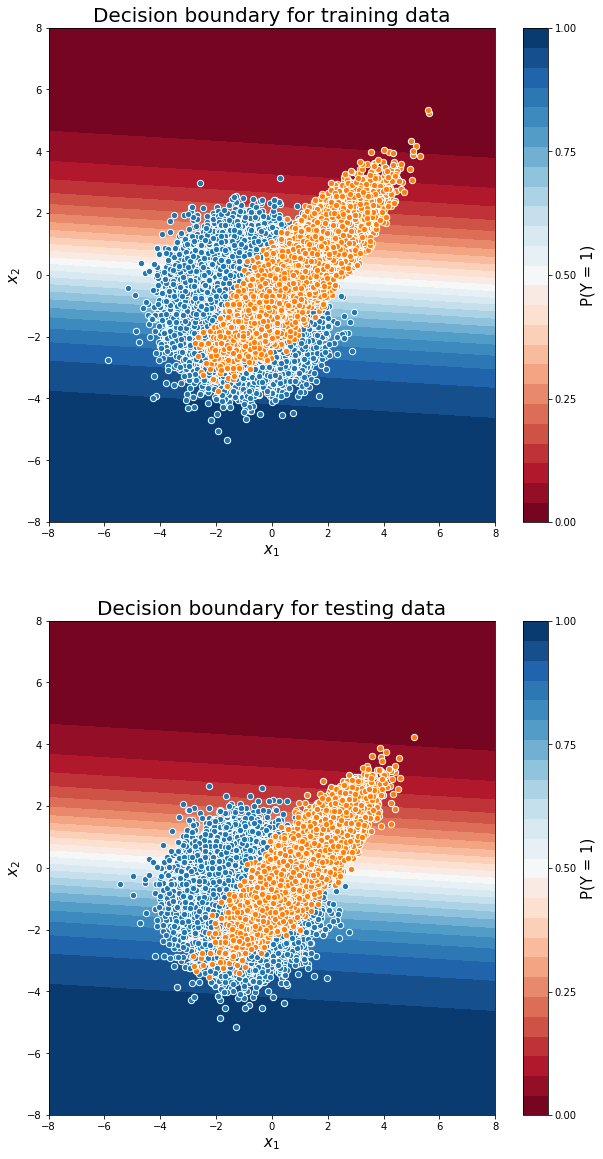

In [351]:
XX, YY = np.mgrid[-8:8:0.01, -8:8:0.01]
ones = np.zeros_like(XX).reshape(-1,1)
grid = np.c_[ones.reshape(-1,1), XX.reshape(-1,1), YY.reshape(-1,1)]
lg = LogReg()
lg.fit
yHat = 1 - lg.predict(grid).reshape(XX.shape[0], XX.shape[1])

x_train_1 = np.array(train_data[train_data.y == 1][['x1', 'x2']])
x_train_0 = np.array(train_data[train_data.y == 0][['x1', 'x2']])
x_test_1 = np.array(test_data[test_data.y == 1][['x1', 'x2']])
x_test_0 = np.array(test_data[test_data.y == 0][['x1', 'x2']])

fig = plt.figure(figsize = (10, 20))
ax1 = fig.add_subplot(211)
contour = plt.contourf(XX, YY, yHat, 25, cmap="RdBu", vmin=0, vmax=1)
colorBar = plt.colorbar(contour)
colorBar.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
colorBar.set_label("P(Y = 1)", fontsize = 15)

plt.scatter(x_train_1[:,0], x_train_1[:,1], s=40, cmap="RdBu", label="class_1", edgecolor="white", linewidth=1)
plt.scatter(x_train_0[:,0], x_train_0[:,1], s=40, cmap="RdBu", label="class_0", edgecolor="white", linewidth=1)
plt.xlabel("$x_{1}$", fontsize = 15)
plt.ylabel("$x_{2}$", fontsize = 15)
plt.title("Decision boundary for training data", fontsize = 20)


ax2 = fig.add_subplot(212)
colorBar = plt.colorbar(contour)
colorBar.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
colorBar.set_label("P(Y = 1)", fontsize = 15)
con = plt.contourf(XX, YY, yHat, 25, cmap="RdBu", vmin=0, vmax=1)
plt.scatter(x_test_1[:,0], x_test_1[:,1], s=40, cmap="RdBu", label="class_1", edgecolor="white", linewidth=1)
plt.scatter(x_test_0[:,0], x_test_0[:,1], s=40, cmap="RdBu", label="class_0", edgecolor="white", linewidth=1)
plt.xlabel("$x_{1}$", fontsize = 15)
plt.ylabel("$x_{2}$", fontsize = 15)
plt.title("Decision boundary for testing data", fontsize = 20)

plt.show()


The decision boundary can be improved. As we can see from the graphs above, the decision boundaries for both training and testing datasets are straight lines. However, the scatterplot shows the two classes can be better separated by a curve. We may need to perform some transformation for $x_{1}$ and $x_{2}$. 

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
train_data = pd.read_csv("mnist_train.csv", delimiter = ",", header = None)
test_data = pd.read_csv("mnist_test.csv", delimiter = ",", header = None)

In [106]:
train_data["train_y"] = np.where(train_data.iloc[:,0] == 3, 1, 0)
test_data["test_y"] = np.where(test_data.iloc[:,0] == 3, 1, 0)
print(train_data.shape)
print(test_data.shape)

(60000, 786)
(10000, 786)


**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

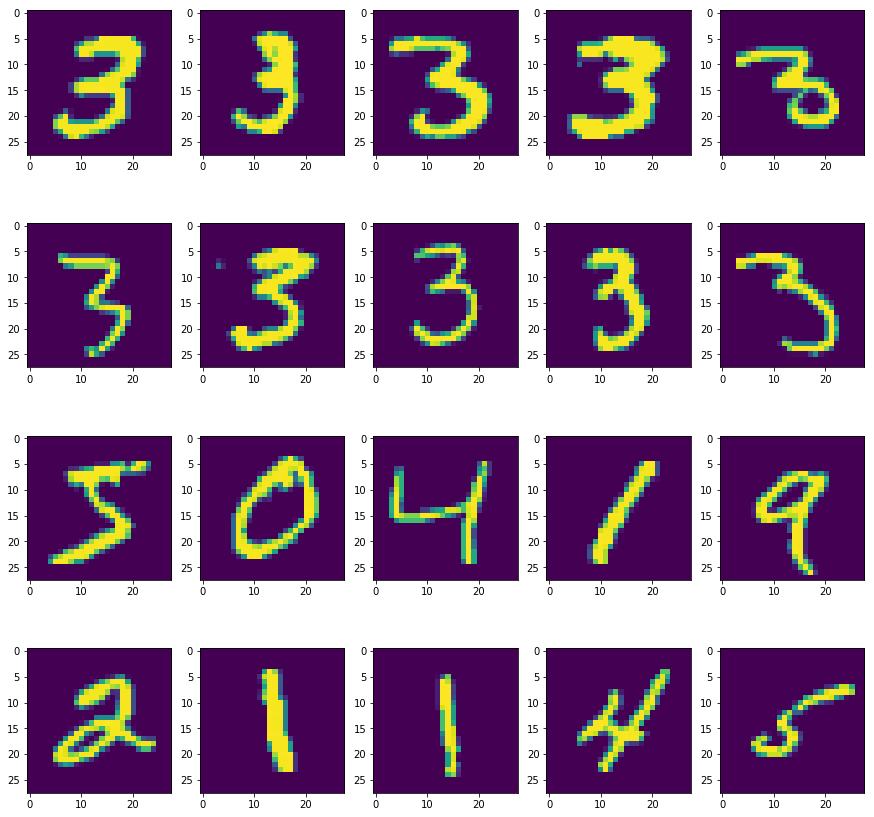

In [107]:
train_data_1 = train_data.loc[train_data["train_y"] == 1]
train_data_0 = train_data.loc[train_data["train_y"] == 0]

plt.figure(figsize = (15, 15))
for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    if i <10:
        ax.imshow(np.array(train_data_1.iloc[i, 1:785]).reshape(28,28))
    else:
        ax.imshow(np.array(train_data_0.iloc[i - 10, 1:785]).reshape(28,28))
        
plt.show()


**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

In [108]:
print(train_data_1.shape[0], "examples of 3 in training dataset.")
print(train_data_0.shape[0], "examples of non-3 in training dataset.")

6131 examples of 3 in training dataset.
53869 examples of non-3 in training dataset.


The classes are unbalanced because the examples of 3 accounts for 11.38% of the total observations. The unbalanced dataset will bias the machine learning prediction model towards the more common class. In this case, a model that has been trained and tested on this dataset could predict towards non-3 class, but still get a very high accuracy.

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

In [109]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

K = 5
KF = StratifiedKFold(n_splits = K)
x_train = np.array(train_data.iloc[:, 1:785])
y_train = np.array(train_data.iloc[:, 785])
x_test = np.array(test_data.iloc[:, 1:785])
y_test = np.array(test_data.iloc[:, 785])

count = 0
for train_idx, test_idx in KF.split(x_train, y_train):
    count += 1
    x_train_ = x_train[train_idx]
    x_test_ = x_train[test_idx]
    y_train_ = y_train[train_idx]
    y_test_ = y_train[test_idx]
   
    logisReg = LogisticRegression(solver = "lbfgs")
    logisReg.fit(x_train_, y_train_)
    prediction = logisReg.predict_proba(x_test_) 


In [113]:
print(y_test_.shape)
print(prediction[:,1].shape)

(11999,)
(11999,)


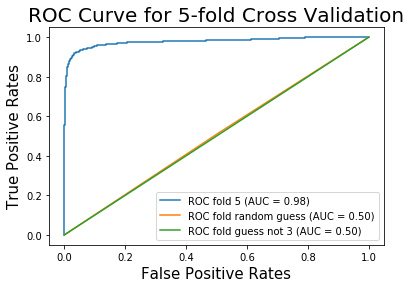

In [115]:
#ROC

#Logistic Regression

fpr, tpr, threshold = roc_curve(y_test_, prediction[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="ROC fold %d (AUC = %0.2f)" % (count, roc_auc))

#Random guess
fpr, tpr, threshold = roc_curve(y_test_, np.random.randint(2, size=len(y_test_)))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="ROC fold random guess (AUC = %0.2f)" % (roc_auc))
    
#Guess all examples are not 3
fpr, tpr, threshold = roc_curve(y_test_, np.zeros((y_test_.shape[0],1)))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="ROC fold guess not 3 (AUC = %0.2f)" % (roc_auc))
    
plt.title("ROC Curve for %d-fold Cross Validation" % K, fontsize = 20)
plt.ylabel("True Positive Rates", fontsize = 15)
plt.xlabel("False Positive Rates", fontsize = 15)
plt.legend()
plt.show()  

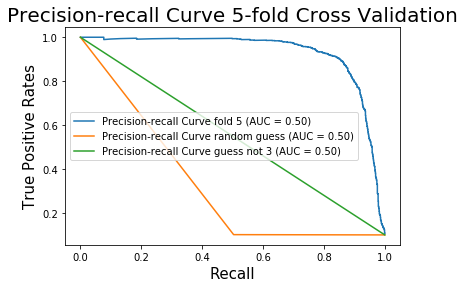

In [110]:
#PR

#Logistic Regression
precision, recall, threshold = precision_recall_curve(y_test_, prediction[:,1])
plt.plot(recall, precision, label="Precision-recall Curve fold %d (AUC = %0.2f)" % (count, roc_auc))

# random guess
precision, recall, threshold = precision_recall_curve(y_test_, np.random.randint(2, size=len(y_test_)))
plt.plot(recall, precision, label="Precision-recall Curve random guess (AUC = %0.2f)" % (roc_auc))
    
#Guess all examples are not 3
precision, recall, threshold = precision_recall_curve(y_test_, np.zeros((y_test_.shape[0],1)))
plt.plot(recall, precision, label="Precision-recall Curve guess not 3 (AUC = %0.2f)" % (roc_auc))
    
plt.title("Precision-recall Curve %d-fold Cross Validation" % K, fontsize = 20)
plt.ylabel("True Positive Rates", fontsize = 15)
plt.xlabel("Recall", fontsize = 15)
plt.legend()
plt.show()  

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

In [230]:
#Move the cost function in Question 1 to this question
from sklearn.metrics import roc_auc_score
def costFunction(X, y, w):
    return -np.mean(y*np.log(1/(1+np.exp(-(np.dot(X,w)))))+(1-y)*np.log(1-1/(1+np.exp(-(np.dot(X,w))))))

c = [0.0001, 0.001, 0.01, 1, 2, 4, 8, 16, 32, 64]
cost = []
coefficient = []
auc1 = []
f1score = []
print(c)
print(x_train.shape)
for i in c[0:1]:
    logisRegRegularized = LogisticRegression(penalty = "l1", C = i)
    logisRegRegularized.fit(x_train, y_train)
    prediction = logisRegRegularized.predict_proba(x_test)
    coefficient.append(np.count_nonzero(logisRegRegularized.coef_))
    cost.append(costFunction(x_test, y_test, logisRegRegularized.coef_.T))
    fpr1, tpr1, threshold = roc_curve(y_test, prediction[:,1])
    auc0 = roc_auc_score(fpr1, tpr1)
    auc1.append(auc(fpr, tpr))
    f1score.append(f1_score(y_test, prediction))

    
#fpr, tpr, threshold = roc_curve(y_test_, prediction[:,1])
#roc_auc = auc(fpr, tpr)
#plt.plot(fpr, tpr, label="R 


[0.0001, 0.001, 0.01, 1, 2, 4, 8, 16, 32, 64]
(60000, 784)


ValueError: continuous format is not supported

In [119]:
print(fpr.type)

AttributeError: 'numpy.ndarray' object has no attribute 'type'

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

According to the US Centers for Disease Control and Prevention, heart disease is the leading cause of death. Around 630,000 Americans die from heart disease every year. I am interested in exploring the relationship between the likelihood of heart disease and some health data or demongraphic factors. I hope using the power of Data Science, I can help to prevent heart disease for other people. 

The dataset, called from "Heart Disease UCI" (https://www.kaggle.com/ronitf/heart-disease-uci), contains 303 observations and 14 variables. The variables' description is listed below:

**age**: age in years<br>
**sex**: 1 = male; 0 = female<br>
**cp**: pain type (0 = Typical angina; 1 = Atypical angina; 3 = Non-anginal pain; 4 = Asymptomatic)<br>
**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)<br>
**chol**: serum cholestoral in mg/dl<br>
**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
**restecg**: resting electrocardiographic results (0 = Nothing to note; 1 = ST-T Wave abnormality; 2 = Possible or definite Left ventricular hypertrophy) <br>
**thalach**: maximum heart rate achieved<br>
**exang**: exercise induced angina (1 = yes; 0 = no)<br>
**oldpeak**: ST depression induced by exercise relative to rest<br>
**slope**: the slope of the peak exercise ST segment (0: Upward sloping; 1: Flat sloping; 2: Downward sloping)<br>
**ca**: number of major vessels (0-3) colored by flourosopy<br>
**thal**: thalium stress test result (1, 3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
**target**: 1(heart disease) or 0(healthy)

**(b)** Download the data and plot the data to describe it.

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


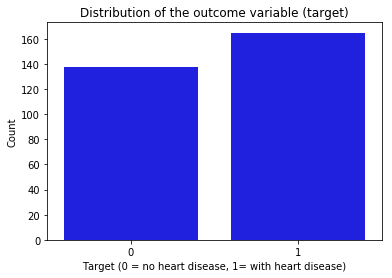

In [234]:
#Distribution of the outcome variable
sns.countplot(x = "target", data = data, color = "blue")
plt.xlabel("Target (0 = no heart disease, 1= with heart disease)")
plt.ylabel("Count")
plt.title("Distribution of the outcome variable (target)")
plt.show()

As we can see from the graph above, the dataset is balanced, which is good for our prediction modeling. Majority of the observations in this dataset are the people with heart disease.

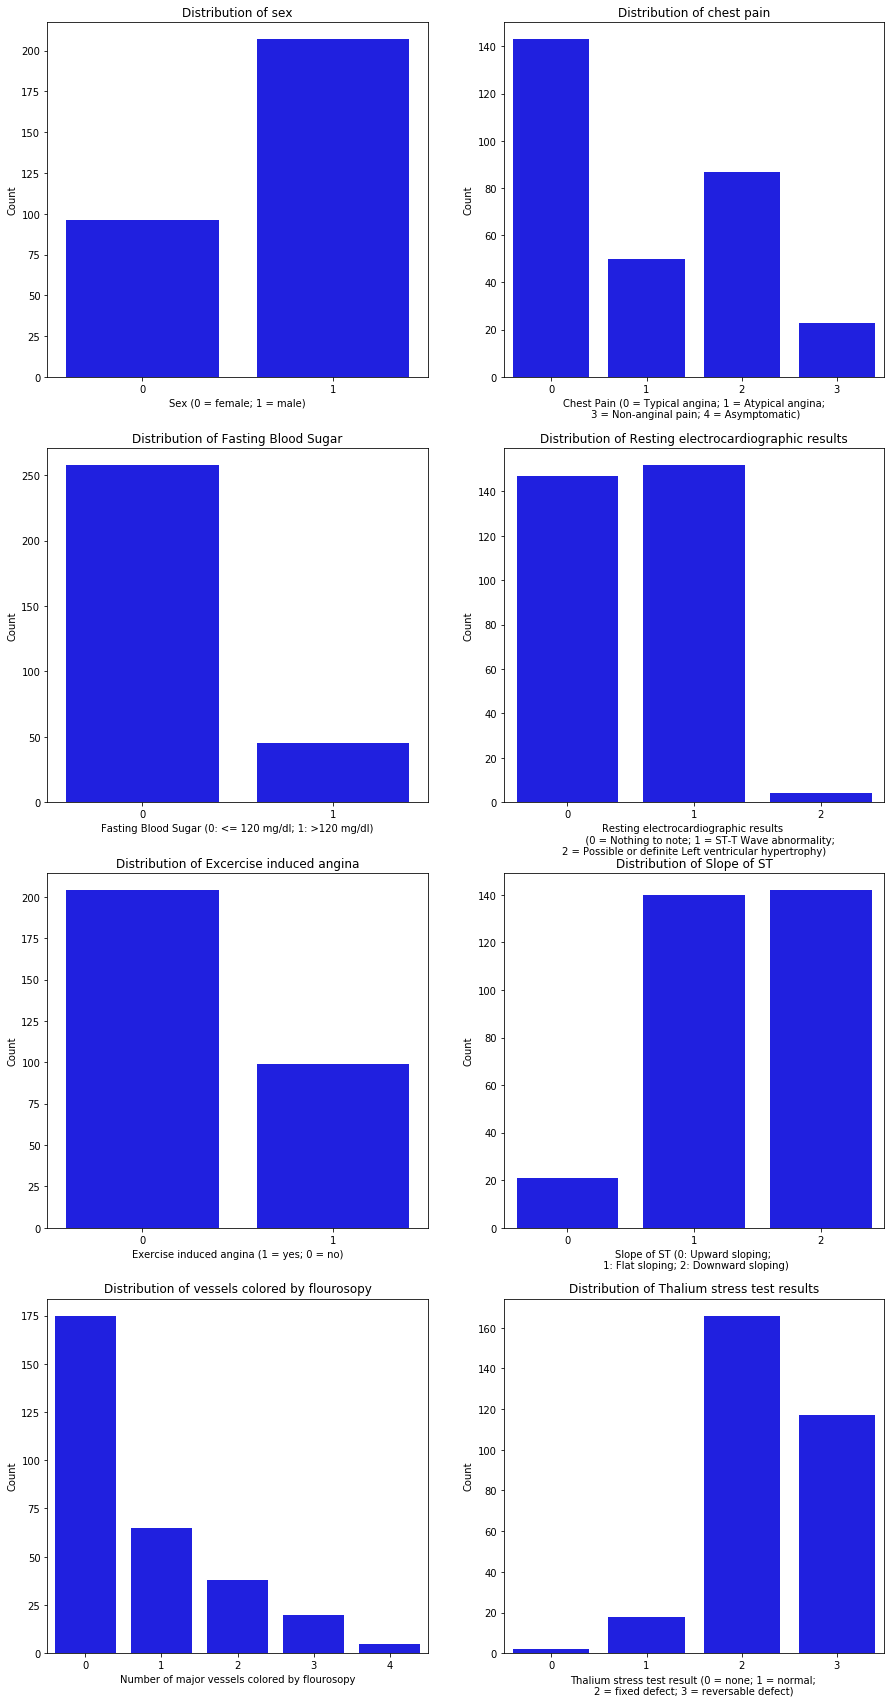

In [215]:
#Plot for categorical variables
fig = plt.figure(figsize=(15, 30))
ax1 = fig.add_subplot(421)
sns.countplot(x = 'sex', data = data, color = "blue")
plt.xlabel("Sex (0 = female; 1 = male)")
plt.ylabel("Count")
plt.title("Distribution of sex")

ax2 = fig.add_subplot(422)
sns.countplot(x = "cp", data = data, color = "blue")
plt.xlabel("Chest Pain (0 = Typical angina; 1 = Atypical angina;\n 3 = Non-anginal pain; 4 = Asymptomatic)")
plt.ylabel("Count")
plt.title("Distribution of chest pain")

ax3 = fig.add_subplot(423)
sns.countplot(x = "fbs", data = data, color = "blue")
plt.xlabel("Fasting Blood Sugar (0: <= 120 mg/dl; 1: >120 mg/dl)")
plt.ylabel("Count")
plt.title("Distribution of Fasting Blood Sugar")

ax4 = fig.add_subplot(424)
sns.countplot(x = "restecg", data = data, color = "blue")
plt.xlabel("Resting electrocardiographic results \n \
          (0 = Nothing to note; 1 = ST-T Wave abnormality; \n2 = Possible or definite Left ventricular hypertrophy)")
plt.ylabel("Count")
plt.title("Distribution of Resting electrocardiographic results")

ax5 = fig.add_subplot(425)
sns.countplot(x = "exang", data = data, color = "blue")
plt.xlabel("Exercise induced angina (1 = yes; 0 = no)")
plt.ylabel("Count")
plt.title("Distribution of Excercise induced angina")

ax6 = fig.add_subplot(426)
sns.countplot(x = "slope", data = data, color = "blue")
plt.xlabel("Slope of ST (0: Upward sloping; \n 1: Flat sloping; 2: Downward sloping)")
plt.ylabel("Count")
plt.title("Distribution of Slope of ST")

ax7 = fig.add_subplot(427)
sns.countplot(x = "ca", data = data, color = "blue")
plt.xlabel("Number of major vessels colored by flourosopy")
plt.ylabel("Count")
plt.title("Distribution of vessels colored by flourosopy")

ax8 = fig.add_subplot(428)
sns.countplot(x = "thal", data = data, color = "blue")
plt.xlabel("Thalium stress test result (0 = none; 1 = normal; \n2 = fixed defect; 3 = reversable defect)")
plt.ylabel("Count")
plt.title("Distribution of Thalium stress test results")

plt.show()

In spite of the fact that majority of the dataset are the people with heart disease, certain health indicators (such as blood sugar, exercise induced angina, number of major vessels colored by flourosopy) are at the healthy level for most people. These indicators might not play an important role in predicting heart disease. However, this statement is based on marginal graphs (i.e. we treat each varialbes independently). They might work together to affect the heart disease.

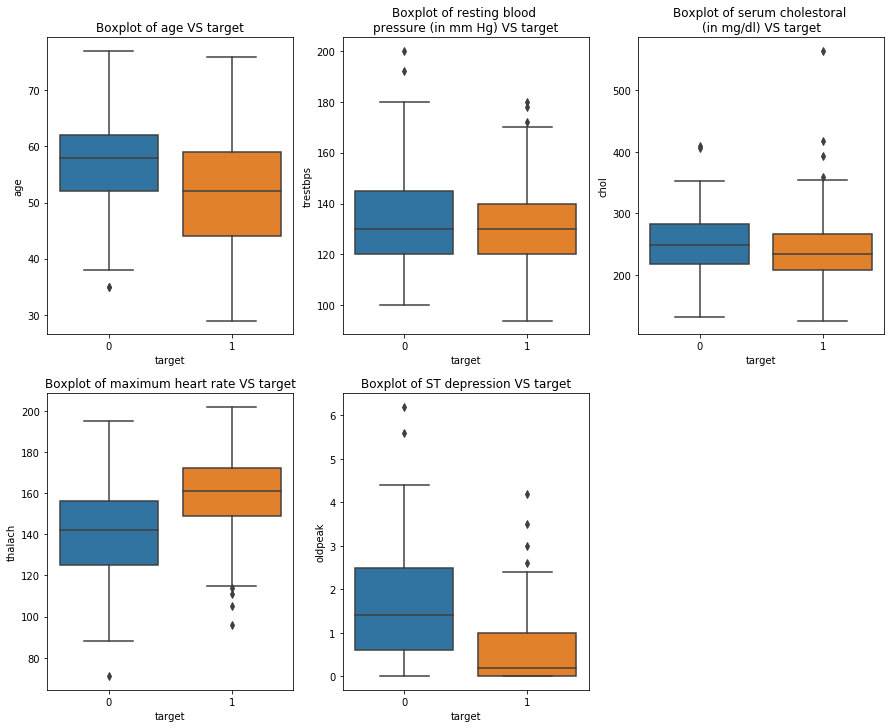

In [202]:
#Plot for continuous variables
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(231)
sns.boxplot(data = data,x ='target',y='age')
plt.title("Boxplot of age VS target")

ax2 = fig.add_subplot(232)
sns.boxplot(data = data,x ='target',y='trestbps')
plt.title("Boxplot of resting blood \npressure (in mm Hg) VS target")

ax3 = fig.add_subplot(233)
sns.boxplot(data = data,x ='target',y='chol')
plt.title("Boxplot of serum cholestoral \n(in mg/dl) VS target")

ax4 = fig.add_subplot(234)
sns.boxplot(data = data,x ='target',y='thalach')
plt.title("Boxplot of maximum heart rate VS target")

ax5 = fig.add_subplot(235)
sns.boxplot(data = data,x ='target',y='oldpeak')
plt.title("Boxplot of ST depression VS target")
plt.show()

The average age of people with heart disease is lower than that of people without heart disease. It appears surprising, but it might make sense because people with heart disease tend to have a shorter life span. 

For the people with heart disease, they seem to have higher maximum heart rate. It makes sense because heart disease normally comes with high rate of heart beat. 

Unhealthy heart will stress more during exercise, so it also makes sense that people with heart disease have lower oldpeak in general.

The rest of the continuous variables are similar for healthy people and people with heart disease.

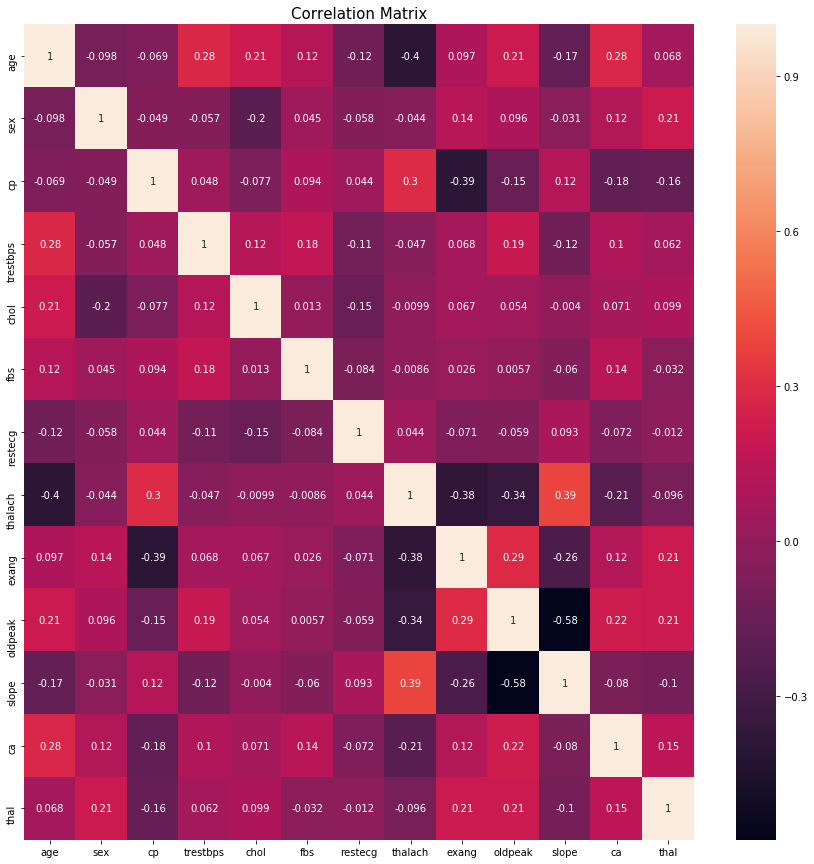

In [208]:
#Check correlation
corr = data.iloc[:,0:13].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.title("Correlation Matrix",fontsize =15)
plt.show()


Based on the correlation matrix above, we can see there are no highly correlated variables. We will not have problem of multicolinearlity if we include all the variables in the modeling.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)?

My target variable is "target", which is the binary outcome variable indicating whether a person has heart disease or not. The predictors will be the 13 feature variables (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, and target). 

In [235]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values in the dataset. 

In [237]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the data summary above, there doesn't seem to be no erroneous data. However, the independent variables have the very different magnitudes, so I will normalize these variables before modeling.

In [238]:
#Normalizing feature variables
from sklearn.preprocessing import StandardScaler
x = data.iloc[:, 0 :13].values
y = data.iloc[:,13].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**(d) What supervised learning technique will you use and why?**

I will use Logistic Regression model because my outcome variables are binary variables and I am interest in a probabilistic interpretation. Moreover, Logistic Regression is very straighforward and easy to understand.

**(e) How will you evaluate performance and know whether you succeeded?**

I will use ROC curve to evaluate the model performance. A good ROC curve has a large area under curve (AUC), which represents high True Postive rate and low False Positive rate. 

**(f) Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.**

I choose to do 5-fold cross validation to evaluate the model performance because the results generated will be more stable and involves less selecion bias. Our dataset has only 300 observations, so cross validation is not computational heavy at all. If we use training and testing split, our training data might not be sufficient. 


**(g) Run your analysis and show your performance. Include plots of your data and of performance.**

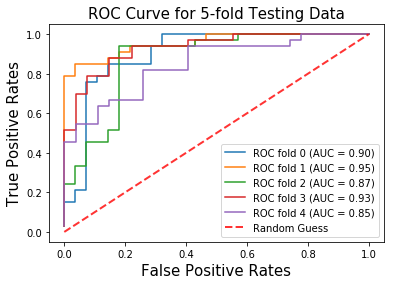

In [251]:
K = 5
KF = StratifiedKFold(n_splits= K)
count = 0
auc = []
for train_idx, test_idx in KF.split(x, y):
     
    x_train = x[train_idx]
    x_test = x[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    logReg = LogisticRegression()
    logReg.fit(x_train, y_train)
    prediction = logReg.predict_proba(x_test)

    fpr, tpr, thrshold = roc_curve(y_test, prediction[:, 1])
    auc.append(roc_auc_score(y_test, prediction[:,1]))
    plt.plot(fpr, tpr, label="ROC fold %d (AUC = %0.2f)" % (count, auc[count]))
    count += 1
    
plt.title("ROC Curve for %d-fold Testing Data" % K, fontsize = 15)
plt.ylabel("True Positive Rates", fontsize = 15)
plt.xlabel("False Positive Rates", fontsize = 15)
plt.plot([0, 1], [0, 1], linestyle="--", lw = 2, color="r", label="Random Guess", alpha = 0.8)
plt.legend()
plt.show()


(h) Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.
(i) Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)